In [1]:
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import glob

C:\Users\light\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\light\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\light\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\light\Anaconda3\envs\deeplearning\lib\site-

In [2]:
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator

# Ensure consistency across runs
from numpy.random import seed
import random
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)

# Imports to view data
import cv2
from glob import glob

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
from keras.utils import print_summary
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Utils
from pathlib import Path
import pandas as pd
import numpy as np
from os import getenv
# import time
import itertools

# Image Preprocessing
from skimage.filters import sobel, scharr

Using TensorFlow backend.


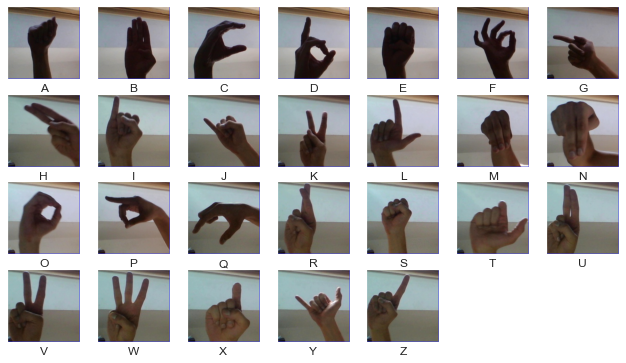

In [3]:
train_dir = './Dataset/original_data/asl_alphabet_train/asl_alphabet_train'
test_dir = './Dataset/original_data/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z']
plt.figure(figsize=(11, 11))
for i in range (0,26):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

# Load data

In [4]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(train_dir)
print('Loading:', time() - start)

Loaded 70200 images for training, Train data shape = (70200, 32, 32, 3)
Loaded 7800 images for testing Test data shape = (7800, 32, 32, 3)
Loading: 80.95142269134521


# Network

# Model config

In [5]:
# model = Sequential()

# model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3)))

# model.add(Flatten())

# model.add(Dense(512, activation='sigmoid'))

# model.add(Dense(26, activation='softmax'))

# # results(model)
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=TARGET_DIMS))
    model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
    model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
    model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(N_CLASSES, activation='softmax'))

NameError: name 'TARGET_DIMS' is not defined

In [ ]:
classes = 26
batch = 128
epochs = 10
learning_rate = 0.0001

In [ ]:
# adam = Adam(lr=learning_rate)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start = time()
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
train_time = time() - start
model.summary()

In [ ]:
  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['acc'], label = 'train_accuracy')
  plt.plot(history.history['val_acc'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

In [ ]:
  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)

In [ ]:
model.save("./output/train_with_original_data.h5")

# Load for train 2

In [ ]:
model1 = keras.models.load_model("./output/train_with_original_data.h5")

In [ ]:
model1.summary()

In [ ]:
def load_data_new(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
#     for folder in os.listdir(train_dir):
#         index +=1
#         for image in os.listdir(train_dir + "/" + folder):
#             temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
#             temp_img = cv2.resize(temp_img, size)
#             images.append(temp_img)
#             labels.append(index)
    srihari_files = glob.glob("./output/srihari/*.png")
    raghul_files = glob.glob("./output/raghul/*.png")
    suresh_files = glob.glob("./output/suresh/*.png")
    
    for i in range(len(srihari_files)):
        temp_img = cv2.imread(srihari_files[i])
        temp_img = cv2.resize(temp_img, size)
        images.append(temp_img)
        labels.append(i)
        temp_img = cv2.imread(raghul_files[i])
        temp_img = cv2.resize(temp_img, size)
        images.append(temp_img)
        labels.append(i)
        temp_img = cv2.imread(suresh_files[i])
        temp_img = cv2.resize(temp_img, size)
        images.append(temp_img)
        labels.append(i)
        
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data_new(train_dir)
print('Loading:', time() - start)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
classes = 26
batch = 64
epochs = 3
learning_rate = 0.01

In [ ]:
model = model1

In [ ]:
  start = time()
  history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  train_time = time() - start

  model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['acc'], label = 'train_accuracy')
  plt.plot(history.history['val_acc'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)

In [ ]:
  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)